Create a linear regression object. Train the model using the training sets. Predict values of y-variable. Plot a scatterplot of y-variable vs. predictor. Calculate MSE (mean square error) and R^2 of both training sets and testing sets 

Y = Calories; X = TotalDistance, Very Active Minutes, TotalSteps

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("cleaned_dataset.csv")

In [3]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
data.shape

(894, 14)

In [5]:
#set random_state to get the same split every time
train, test = train_test_split(data, test_size=0.2, random_state=42)

print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(train.shape))
print("Shape of test dataset is: {0}".format(test.shape))

Shape of full dataset is: (894, 14)
Shape of training dataset is: (715, 14)
Shape of test dataset is: (179, 14)


In [6]:
# extract y and x train data
y_train = np.array(train.Calories)
print(y_train.shape)

x_td = np.array(train.TotalDistance)
x_vam = np.array(train.VeryActiveMinutes)
x_ts = np.array(train.TotalSteps)

x_td = x_td.reshape(x_td.shape[0], 1)
x_vam = x_vam.reshape(x_vam.shape[0], 1)
x_ts = x_ts.reshape(x_ts.shape[0], 1)

print(x_td.shape, x_vam.shape, x_ts.shape)

(715,)
(715, 1) (715, 1) (715, 1)


Text(0, 0.5, 'Calories')

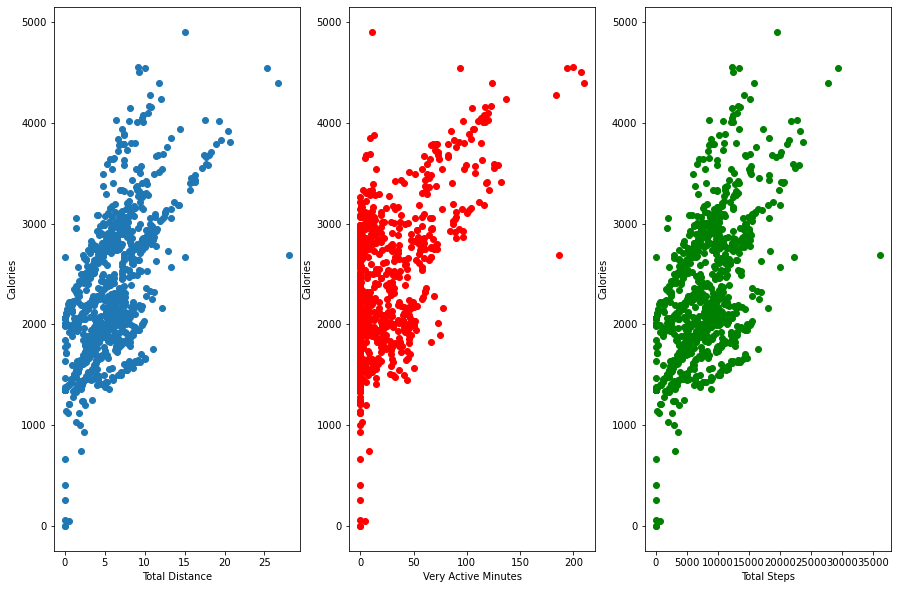

In [7]:
# quick scatterplot of data
fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].plot(data.TotalDistance, data.Calories, 'o')
ax[0].set_xlabel("Total Distance")
ax[0].set_ylabel("Calories")

ax[1].plot(data.VeryActiveMinutes, data.Calories, 'o', color='red')
ax[1].set_xlabel("Very Active Minutes")
ax[1].set_ylabel("Calories")

ax[2].plot(data.TotalSteps, data.Calories, 'o', color='green')
ax[2].set_xlabel("Total Steps")
ax[2].set_ylabel("Calories")

In [8]:
# extract y and x test data
y_test = np.array(test.Calories)
print(y_test.shape)

X_td = np.array(test.TotalDistance)
X_vam = np.array(test.VeryActiveMinutes)
X_ts = np.array(test.TotalSteps)

X_td = X_td.reshape(X_td.shape[0], 1)
X_vam = X_vam.reshape(X_vam.shape[0], 1)
X_ts = X_ts.reshape(X_ts.shape[0], 1)

print(X_td.shape, X_vam.shape, X_ts.shape)

(179,)
(179, 1) (179, 1) (179, 1)


# We are training the model on "Total Distance"

In [9]:
# train the model using a linear regression
regression = LinearRegression()

# total distance
regression.fit(x_td, y_train)
predicted_y = regression.predict(X_td)

Text(0.5, 1.0, 'Total Distance')

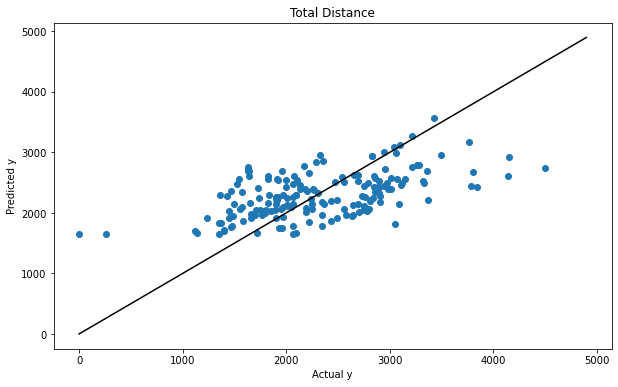

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color="black") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance")

In [11]:
r2_test = regression.score(X_td, y_test)
r2_train = regression.score(x_td, y_train)
mse_test = mean_squared_error(predicted_y, y_test)
mse_train = mean_squared_error(y_train, regression.predict(x_td))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')
print(f'Coefficients: m = {regression.coef_[0]}, b = {regression.intercept_}')

MSE of test data = 3.3913e+05
MSE of train data = 2.9642e+05
R^2 of Test = 0.30613
R^2 of Train = 0.42542
Coefficients: m = 117.88750594990077, b = 1651.3174307937381


# We are training the data on "Very Active Minutes"

In [12]:
# very active minutes
regression.fit(x_vam, y_train)
predicted_y = regression.predict(X_vam)

Text(0.5, 1.0, 'Very Active Minutes')

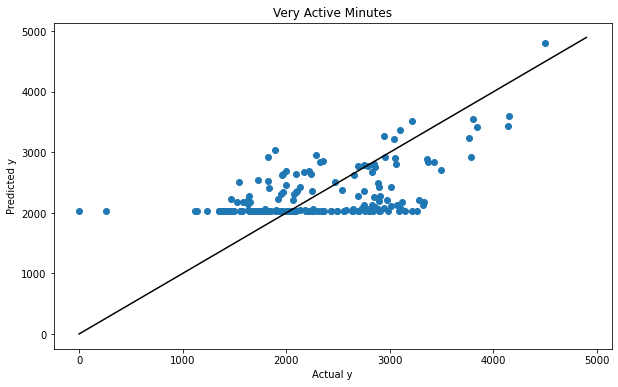

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color="black") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Very Active Minutes")

In [14]:
r2_test = regression.score(X_vam, y_test)
r2_train = regression.score(x_vam, y_train)
mse_test = mean_squared_error(predicted_y, y_test)
mse_train = mean_squared_error(y_train, regression.predict(x_vam))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')
print(f'Coefficients: m = {regression.coef_[0]}, b = {regression.intercept_}')

MSE of test data = 3.4788e+05
MSE of train data = 3.1222e+05
R^2 of Test = 0.28823
R^2 of Train = 0.3948
Coefficients: m = 13.395373094309889, b = 2032.323268218442


# We are training the model on "Total Steps"

In [15]:
# total steps
regression.fit(x_ts, y_train)
predicted_y = regression.predict(X_ts)

Text(0.5, 1.0, 'Very Active Minutes')

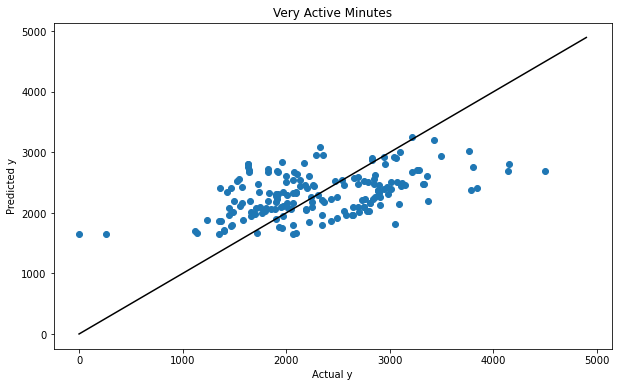

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color="black") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Very Active Minutes")

In [17]:
r2_test = regression.score(X_ts, y_test)
r2_train = regression.score(x_ts, y_train)
mse_test = mean_squared_error(predicted_y, y_test)
mse_train = mean_squared_error(y_train, regression.predict(x_ts))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')
print(f'Coefficients: m = {regression.coef_[0]}, b = {regression.intercept_}')

MSE of test data = 3.7602e+05
MSE of train data = 3.3194e+05
R^2 of Test = 0.23065
R^2 of Train = 0.35656
Coefficients: m = 0.08463726403293942, b = 1653.870987702615
